In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from xgboost import to_graphviz
from xgboost import plot_tree
from IPython.display import Image
import matplotlib.pyplot as plt
import pydotplus

# Load your data (replace with your actual data loading)
data = pd.read_csv(r"C:\Users\jishn\OneDrive\Documents\GitHub\imsa.ai-edu25\diabetes.csv")

# Split data into features (X) and target variable (y)
X = data.drop("Outcome", axis=1)  # Replace "target_column" with the name of your target column
y = data["Outcome"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree XGBclassifier
clf = XGBClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7207792207792207


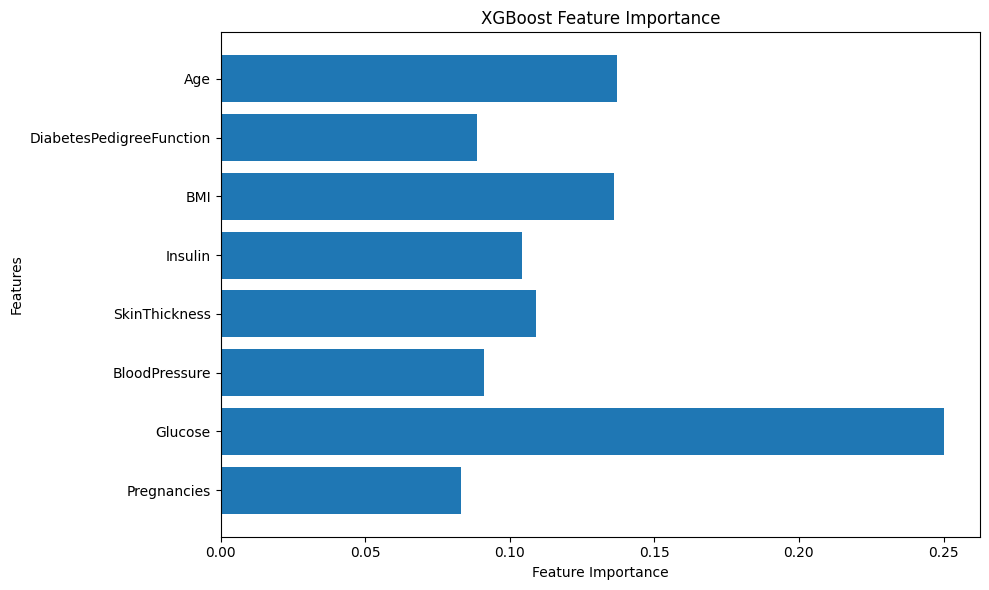

C:\Users\jishn\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [3]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, clf.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

# Optional: Plot one of the trees in the ensemble
graph = to_graphviz(clf, num_trees=0)

graph.render("xgboost_tree", format="png")
graph

# Open via PDF for easier zooming
# graph.render('xgboost_tree', view=True)